In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
sns.set(style='white',rc={'figure.figsize':(9,9)})

## Make the fake noisy data

In [151]:
def make_sine(n):
    x = np.linspace(0,2*np.pi,n)
    y = np.sin(x) + np.random.random(n) * 0.4
    x = x.reshape(n,1)
    y = y.reshape(n,1)
    sine = np.concatenate((x,y), axis=1)
    return sine

In [200]:
c1 = np.random.normal(loc=(0,4), scale=0.2, size=(100,2))
c2 = np.random.normal(loc=(-4,-2), scale=0.7, size=(200,2))
moons = data.make_moons(n_samples=200, noise=0.05)[0][:,:2]
moons[:,0] += 0.8  # shift x axis
moons[:,1] -= 3  # shift y axis
sine = make_sine(100)
noise = 14 * np.random.random_sample(size=(500, 2)) - 7  # background noise

C = np.vstack((c1, c2, noise, moons, sine))  # concat all the points

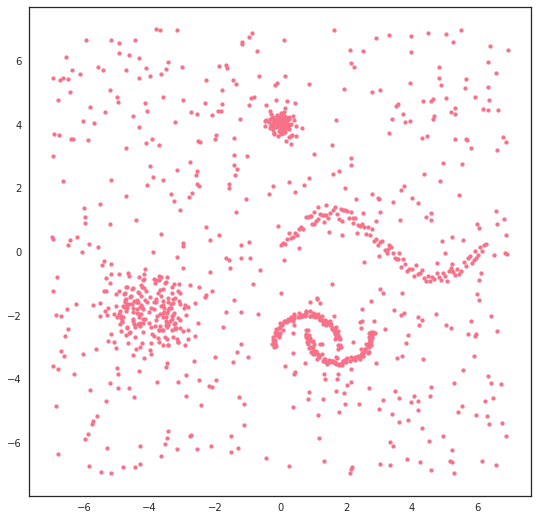

In [201]:
plt.scatter(C[:,0], C[:,1], s=15)

-----------------

In [202]:
from sklearn.cluster import KMeans, DBSCAN
import hdbscan

## k-means

In [203]:
kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans.fit_predict(C)

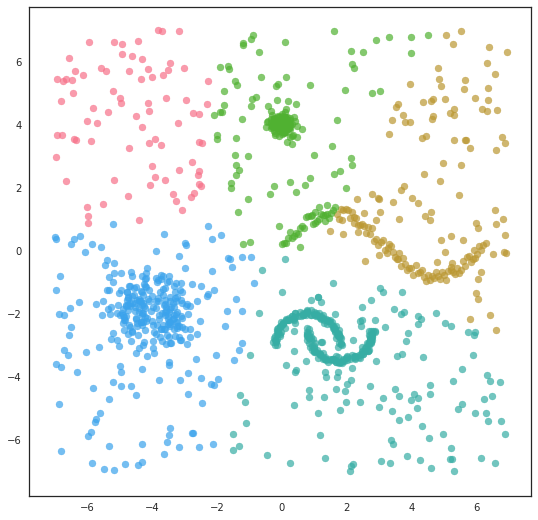

In [204]:
for c in np.unique(labels_kmeans):
    plt.scatter(C[labels_kmeans==c,0], C[labels_kmeans==c,1], s=15, alpha=0.7)

## DBSCAN

In [205]:
dbscan = DBSCAN(eps=0.4, min_samples=8)
labels_dbscan = dbscan.fit_predict(C)
print('N clusters found:',len(np.unique(labels_dbscan)) - 1)

N clusters found: 4


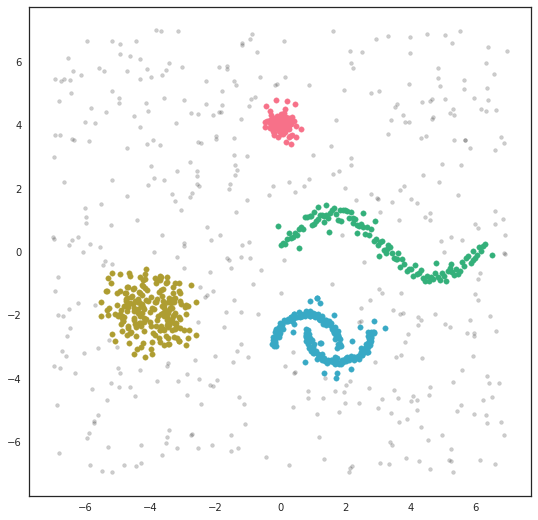

In [234]:
plt.figure()
sns.set_palette('husl', n_colors=5)
labels_db_unique = np.unique(labels_dbscan)
for c in labels_db_unique[labels_db_unique != -1]:
    plt.scatter(C[labels_dbscan==c,0], C[labels_dbscan==c,1], s=30)
plt.scatter(C[labels_dbscan==-1,0], C[labels_dbscan==-1,1], s=15, c='k', alpha=0.2)
plt.show()

## HDBSCAN

In [221]:
hdb = hdbscan.HDBSCAN(min_cluster_size=30,min_samples=9)
labels = hdb.fit_predict(C)

<Figure size 648x648 with 0 Axes>

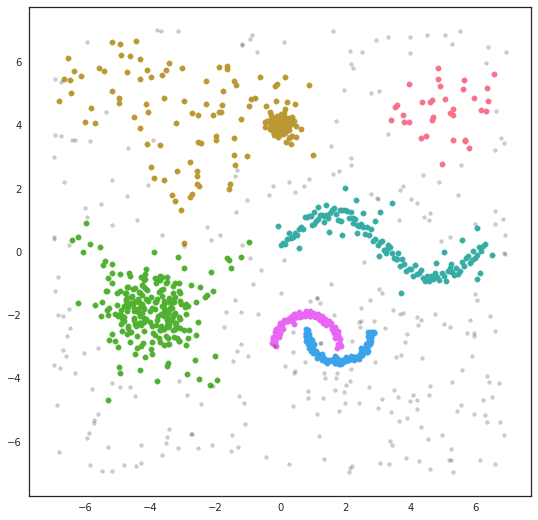

In [232]:
plt.figure()
sns.set_palette('husl')
labels_hdb_unique = np.unique(labels)
plt.figure()
for c in labels_hdb_unique[labels_hdb_unique != -1]:
    plt.scatter(C[labels==c,0], C[labels==c,1], s=30)
plt.scatter(C[labels==-1,0], C[labels==-1,1], s=15, c='k', alpha=0.2)
plt.show()

## Gaussian Mixture

In [223]:
from sklearn.mixture import GaussianMixture

In [224]:
gauss_mix = GaussianMixture(n_components=4)

In [225]:
labels_gaus = gauss_mix.fit(C).predict(C)

In [226]:
np.unique(labels_gaus)

array([0, 1, 2, 3])

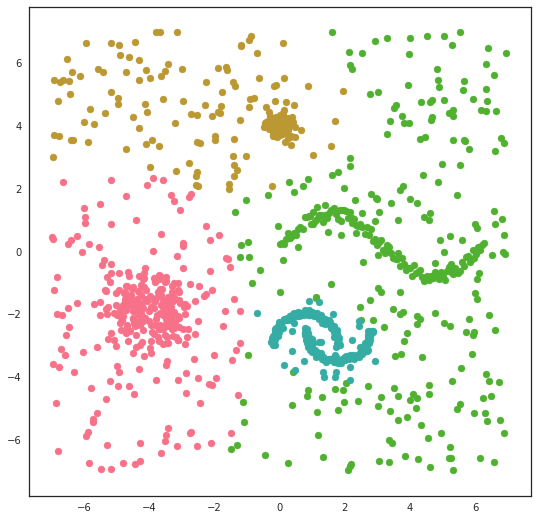

In [227]:
plt.figure()

for c in np.unique(labels_gaus):
    plt.scatter(C[labels_gaus==c,0], C[labels_gaus==c,1])
plt.show()